In [29]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re

In [30]:
from konlpy.tag import Hannanum
from urllib.request import urlopen
from lxml import html
from collections import Counter
import nltk

import random
import pytagcloud      # requires Korean font support
import webbrowser

In [33]:
word = pd.read_csv('./teample_1/hankyure_economy_uft.csv', sep=',', encoding='utf-8')
word

,Unnamed: 0,날짜,제목
0,0,2018-11-13,최종구 “특정산업 리스크 이유로 대출 일괄회수할 게 아니다”
1,1,2018-11-13,"삼성바이오 분식회계 의혹 내부문건, 증선위 수용 여부가 핵심"
2,2,2018-11-13,SK 한국시리즈 우승 함께한 SK그룹 4형제
3,3,2018-11-13,변죽만 울리다 금리인상 ‘실기론’…한은 뾰족수 낼까
4,4,2018-11-13,국제유가 인상에도 대한항공 사상 최대 분기 매출
5,5,2018-11-13,‘스마트 공항’을 넘어 ‘공항도시’로
6,6,2018-11-13,한전 3분기 흑자 전환…영업이익 1조3952억원
7,7,2018-11-13,대-중기 임금격차 축소 해법은 ‘연대임금’
8,8,2018-11-13,하이테크 부동산 서비스 생태계 만든다...‘한국프롭테크포럼’ 출범
9,9,2018-11-13,해외자원개발 실패 꼬리표 뗄 때까지 혁신에 또 혁신


In [34]:
xyz = list(word['제목'])

In [35]:
words = str()

for i in range(len(xyz)):
    words += xyz[i]

words

'최종구 “특정산업 리스크 이유로 대출 일괄회수할 게 아니다”삼성바이오 분식회계 의혹 내부문건, 증선위 수용 여부가 핵심SK 한국시리즈 우승 함께한 SK그룹 4형제변죽만 울리다 금리인상 ‘실기론’…한은 뾰족수 낼까국제유가 인상에도 대한항공 사상 최대 분기 매출‘스마트 공항’을 넘어 ‘공항도시’로한전 3분기 흑자 전환…영업이익 1조3952억원대-중기 임금격차 축소 해법은 ‘연대임금’하이테크 부동산 서비스 생태계 만든다...‘한국프롭테크포럼’ 출범해외자원개발 실패 꼬리표 뗄 때까지 혁신에 또 혁신현대·기아차, 보다폰과 손잡고 유럽서 커넥티드카 서비스 개시전경련, 7대 주력산업 협의체 발족신동빈 12일밤 귀국…지주사 회의 갖고 경영 정상화 ‘고삐’수능일 오후 1시5분부터 35분간 항공기 이착륙 금지SK-신한금융, 200억원 규모 사회적기업 펀드 만들기로우리는 금본위제로 돌아갈 수 있을까새우깡·자갈치·꿀꽈배기 몸값 또 오른다납품가 후려치기 등 불공정 기업 벌점 최대 2배로스마트공장 구축한 중소기업 10곳 중 7곳 ‘만족’지주회사 전환 ‘마술’…재벌일가 지분율 2배 껑충DSR 시행 앞두고…은행 가계대출 2년만에 최대폭 증가대한상의 일하기 좋은 중소기업 565곳 선정무전기야? 스마트폰이야?…KT, ‘라져 S’ 출시세계 반도체 순위…삼성 1위 굳히고 SK하이닉스 3위로 오른다대우전자 ’미니’ 세탁기, 광군제서 2만3000대 완판1~9월 세금 26조원 더 걷혀…법인세는 이미 연간목표 달성SKT, 수험생에 티맵택시 무료 탑승 서비스[단독] “CJ헬로, 제4 이동통신 사업자 준비해왔다”중-미 무역전쟁 어디로?‘음란물 유통’ 웹하드에 징벌적 과징금 부과 추진표본 2배 늘린다지만…여전히 못믿을 ‘집값 주간 통계’대형 건조기 경쟁, LG전자가 먼저 16㎏급 낸다갈등해소에 ‘무용지물’…제구실 못 하는 산은 경영견제 장치유류세 내려 기름값↓, 기분 좋아해도 되는 건가?“아버지도 뇌졸중으로 잃었는데 신뢰가 우선…자금회수 뜻 없다”‘분식회계 사건’ 결론 앞둔 삼성바이오, 하루만에 주가 22

### 트위터로 단어 뽑기

In [36]:
# from konlpy.tag import Hannanum
# from konlpy.tag import Kkma
# from konlpy.tag import Komoran
# from konlpy.tag import Mecab
from konlpy.tag import Twitter

In [37]:
twitter = Twitter()
nouns3 = twitter.nouns(words)
count3 = Counter(nouns3)

C:\Python\Anaconda3-52\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [38]:
tmp_wordsource_economy = count3.most_common()
# tmp_wordsource_society

### (중간)데이터프레임화하기

In [40]:
common_word_economy = pd.DataFrame({'경제단어' : count3.most_common()})

In [41]:
common_word_economy

,경제단어
0,"(삼성, 304)"
1,"(한국, 232)"
2,"(정부, 205)"
3,"(기업, 166)"
4,"(회장, 159)"
5,"(명, 150)"
6,"(금융, 146)"
7,"(전자, 146)"
8,"(투자, 139)"
9,"(등, 129)"


### (중간)데이터프레임화한 것 저장

In [42]:
common_word_economy.to_csv('teample_1/common_word_economy_utf.csv', sep=',', encoding='utf-8')

In [43]:
common_word_economy.to_csv('teample_1/common_word_economy_euc.csv', sep=',', encoding='euc-kr')

## 단어 분류

In [44]:
one_words = []
tow_words = []
etc_words = []
for noun in nouns3:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        tow_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(tow_words), len(etc_words)

(5351, 26648, 7780)

In [45]:
one_words = list(set(one_words))
tow_words = list(set(tow_words))
etc_words = list(set(etc_words))

len(one_words), len(tow_words), len(etc_words)

(500, 4723, 2312)

In [46]:
for word in one_words:
    print(word, end='\t')

답	앤	씨	엘	빅	담	뉴	밤	밖	국	코	펜	욱	사	폰	회	파	욕	절	의	토	공	펫	재	템	빚	팝	맘	것	혈	상	헬	경	송	멍	중	닷	귀	임	컵	랩	꽉	빛	브	부	전	고	준	갑	누	빙	쌀	호	후	끌	립	퀵	좀	밸	필	꼴	볕	땅	덜	휘	번	산	복	눈	뻔	댐	학	뒤	슨	창	주	맥	죄	홈	탓	유	큘	듯	뭘	도	그	팔	엄	석	이	렌	위	네	북	니	방	룻	머	텍	세	판	곁	쇼	꿰	구	율	굴	피	형	놈	녀	폼	열	계	워	매	몫	벌	종	넛	볼	득	너	박	로	두	깨	배	숲	바	똥	탈	곳	태	분	꼭	몸	말	업	포	겁	군	반	껏	더	린	륜	협	렉	얼	메	살	양	큐	모	릭	처	향	핀	괌	랬	빼	착	론	면	문	추	값	례	저	홍	관	몇	닉	김	통	백	막	킥	합	길	감	꼽	골	급	평	잣	뻥	척	묵	광	칼	킹	팀	겨	권	쩐	금	악	춤	탁	게	스	싹	은	설	내	변	꽤	충	량	입	찬	폐	민	장	투	확	캐	함	원	수	봄	셈	속	납	총	톡	농	끼	뼈	특	약	러	작	능	힐	외	꿈	격	런	친	를	끈	얀	풀	돈	뭉	봉	난	층	나	션	별	디	건	퍼	영	졸	증	족	육	빵	개	옷	당	케	애	신	환	뱅	뿐	차	을	찮	핵	색	조	활	낮	존	뿔	집	락	캡	철	퇴	인	률	윈	맛	물	못	완	드	요	넌	콕	봇	쉬	해	강	마	짱	빗	축	알	묘	노	발	초	닭	딸	앱	둘	칩	옥	레	글	자	움	뚝	촌	숨	섬	성	곧	램	새	늘	순	식	헌	샘	패	소	톤	손	짐	콘	예	멕	날	현	치	벗	승	베	시	틈	등	줄	운	톱	덕	셀	찜	직	불	료	빈	독	밥	칠	카	용	적	표	결	비	땀	낚	엠	품	역	맨	귤	남	심	쿡	진	웃	무	황	셰	짝	끝	쏙	오	책	겉	또	때	채	키	정	거	캠	쾅	명	청	콜	쪽	탑	택	규	넷	짤	흙	햄	최	교	익	객	찍	쓱	폴	잡	망	월	앞	던	딥	터	화	각	넉	범	뜻	법	령	쉰	암	선	기	질	만	취	온	달	제	폭	행	과	술	웰	타	체	맵	액	단	픽	점	젠	겹	및	뜰	간	어	꽃	윤	턱	뭐	안	리	년	첫	앗	보	늪	병	삶	쉑	밑	컨	왜	힘	실	돌	검	혹	류	붐	룰	일	꿀	팸	밀	견	죽	낼	편	여	버	데	틀	생	잔	연	땐	

In [47]:
stop_words = []
# stop_words = ['제', '월', '일','조','수','때','그','이','바','및','안']
stop_words.extend(one_words)
len(stop_words)

500

In [48]:
# stop_words 빼기
economy_nouns = [word for word in nouns3 if word not in stop_words]
len(economy_nouns)

34428

In [49]:
economy_nouns[:10]

['최종', '특정', '산업', '리스크', '이유', '대출', '일괄', '회수', '삼성', '바이오']

In [50]:
economy  = nltk.Text(economy_nouns, name='사회기사')
type(economy), len(economy)

(nltk.text.Text, 34428)

In [51]:
economy.vocab().most_common(30)

[('삼성', 304),
 ('한국', 232),
 ('정부', 205),
 ('기업', 166),
 ('회장', 159),
 ('금융', 146),
 ('전자', 146),
 ('투자', 139),
 ('주택', 129),
 ('단독', 123),
 ('대출', 122),
 ('경제', 111),
 ('지원', 106),
 ('최대', 102),
 ('증가', 100),
 ('사회', 99),
 ('현대차', 98),
 ('은행', 92),
 ('금리', 89),
 ('성장', 89),
 ('산업', 86),
 ('논란', 84),
 ('채용', 84),
 ('인상', 83),
 ('고용', 83),
 ('중소기업', 82),
 ('국내', 80),
 ('내년', 79),
 ('서울', 79),
 ('일자리', 79)]

## 워드클라우드 한글폰트 설정

In [52]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [53]:
data = economy.vocab().most_common(1000)
len(data)

1000

In [54]:
data[:10]

[('삼성', 304),
 ('한국', 232),
 ('정부', 205),
 ('기업', 166),
 ('회장', 159),
 ('금융', 146),
 ('전자', 146),
 ('투자', 139),
 ('주택', 129),
 ('단독', 123)]

In [55]:
# data를 딕셔너리 형태로 변환
dict_data = dict(data)
len(dict_data)

1000

### 워드클라우드 그리기

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [57]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white'
                     ,relative_scaling =0.2).generate_from_frequencies(dict_data)

(-0.5, 399.5, 199.5, -0.5)

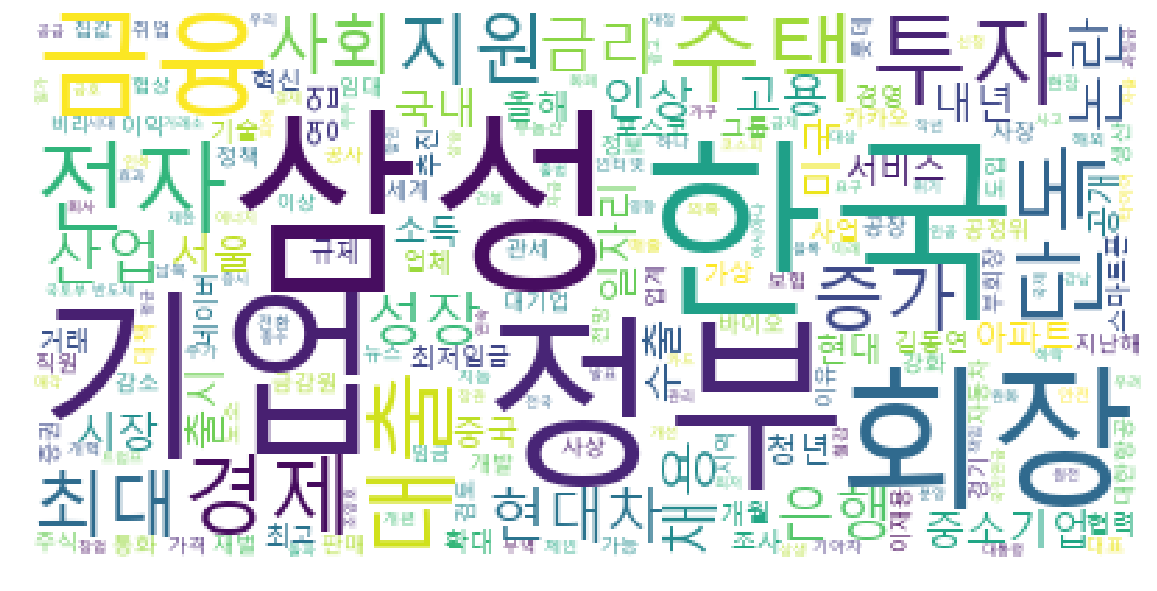

In [58]:
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis('off')

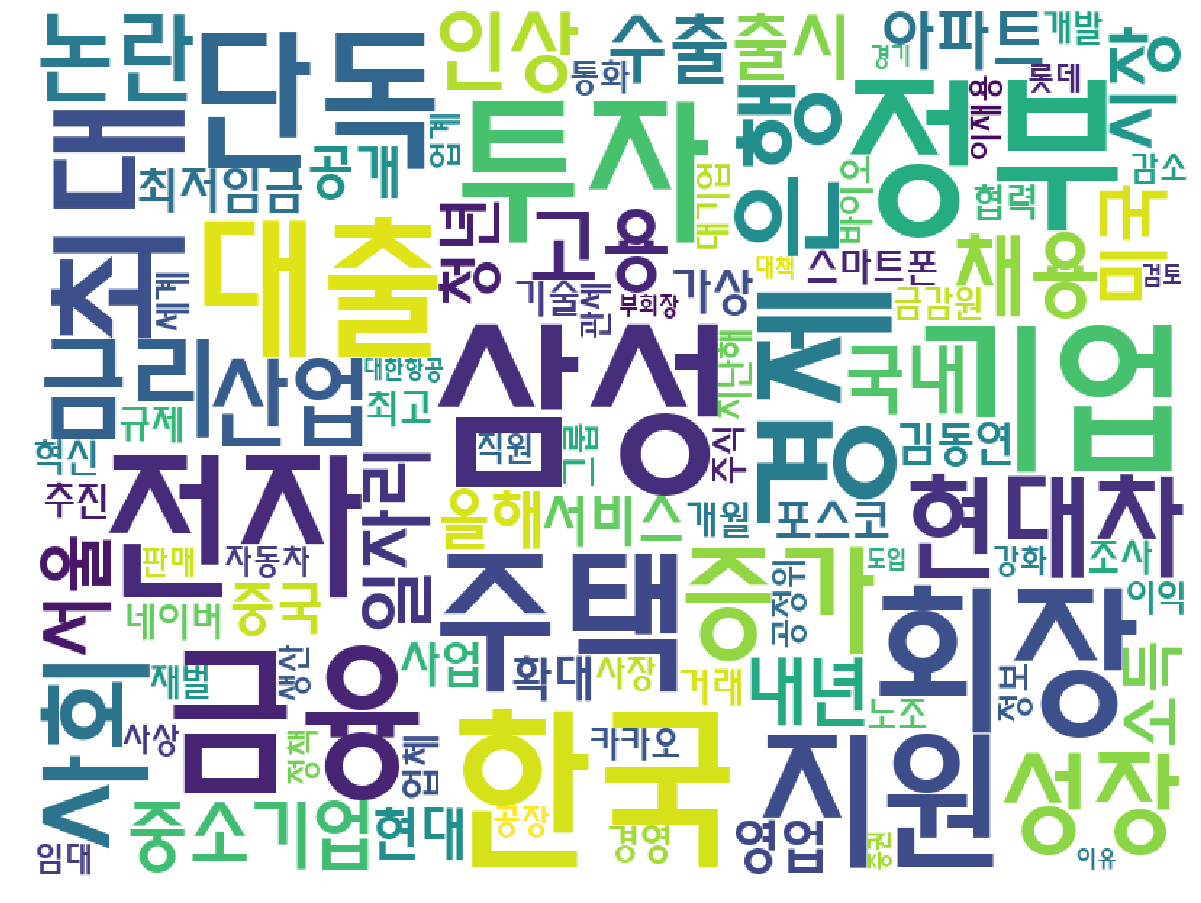

In [59]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

save_img = 'teample_1_result/economy_1.png'

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)